In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#get the data
data = pd.read_csv('./fashion-mnist_test.csv')
data = data.as_matrix()

/Users/anastasia/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
X = data[:, 1:].reshape(-1, 28, 28, 1)/255.0
Y = data[:, 0].astype(np.int32)

In [5]:
K = len(set(Y))
K

10

In [6]:
#one-hot encoding
Y =  to_categorical(Y)
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
#the model - sequence of layers
model = Sequential()

In [8]:
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
#prints epochs and accuracy
#gives back keras history object
r = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)
print('Returned:', r)

Instructions for updating:
Use tf.cast instead.
Train on 6699 samples, validate on 3301 samples
Epoch 1/15
6699/6699 [==============================] - 21s 3ms/step - loss: 0.7509 - acc: 0.7307 - val_loss: 0.5738 - val_acc: 0.7913
Epoch 2/15
6699/6699 [==============================] - 16s 2ms/step - loss: 0.4850 - acc: 0.8246 - val_loss: 0.4897 - val_acc: 0.8191
Epoch 3/15
6699/6699 [==============================] - 17s 3ms/step - loss: 0.3899 - acc: 0.8552 - val_loss: 0.5374 - val_acc: 0.8104
Epoch 4/15
6699/6699 [==============================] - 28s 4ms/step - loss: 0.3297 - acc: 0.8704 - val_loss: 0.4400 - val_acc: 0.8225
Epoch 5/15
6699/6699 [==============================] - 17s 3ms/step - loss: 0.2749 - acc: 0.8997 - val_loss: 0.4504 - val_acc: 0.8367
Epoch 6/15
6699/6699 [==============================] - 16s 2ms/step - loss: 0.2294 - acc: 0.9160 - val_loss: 0.4945 - val_acc: 0.8364
Epoch 7/15
6699/6699 [==============================] - 17s 2ms/step - loss: 0.2001 - acc: 0.9

In [11]:
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


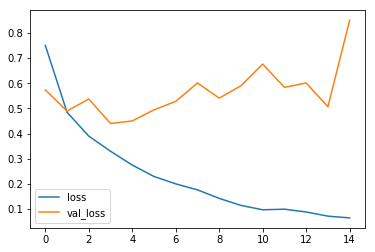

In [13]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

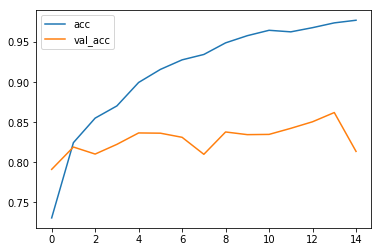

In [14]:
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
#keras functional api
#pass datagraph node to each layer
# i = Input(shape=(28, 28, 1))
# x = Conv2D(filters=32, kernel_size=(3, 3))(i)
# model = Model(inputs=i, outputs=x)